In [1]:
import pandas as pd
Wine = pd.read_csv("WineQT.csv")
Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

X_original = Wine.drop(columns=["quality","Id","pH","density"])
y_original = np.where(Wine.quality >= 7,1,0)

print(f"Distribución de clases antes del sobremuestreo: {Counter(y_original)}")

adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_adasyn, y_adasyn = adasyn.fit_resample(X_original, y_original)
print(f"Distribución de clases después de ADASYN: {Counter(y_adasyn)}")

# Borderline-SMOTE
borderline_smote = BorderlineSMOTE(sampling_strategy='minority', random_state=42, kind='borderline-1')
X_borderline, y_borderline = borderline_smote.fit_resample(X_original, y_original)
print(f"Distribución de clases después de Borderline-SMOTE: {Counter(y_borderline)}")

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_ros, y_ros = ros.fit_resample(X_original, y_original)
print(f"Distribución de clases después de sobremuestreo simple: {Counter(y_ros)}")

# Submuestreo simple con RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_rus, y_rus = rus.fit_resample(X_original, y_original)
print(f"Distribución de clases después de submuestreo simple: {Counter(y_rus)}")

# SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X_original, y_original)

Distribución de clases antes del sobremuestreo: Counter({0: 984, 1: 159})
Distribución de clases después de ADASYN: Counter({1: 1002, 0: 984})
Distribución de clases después de Borderline-SMOTE: Counter({0: 984, 1: 984})
Distribución de clases después de sobremuestreo simple: Counter({0: 984, 1: 984})
Distribución de clases después de submuestreo simple: Counter({0: 159, 1: 159})


# ADASYN

In [3]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

log_reg = LogisticRegression(max_iter=2000)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

coef_log_reg = []
precision_scores = []
recall_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y_train), 1):
    
    X_fold_train, X_fold_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]
        
    log_reg.fit(X_fold_train, y_fold_train)
    
    coef_log_reg.append(log_reg.coef_[0])
    
    y_pred = log_reg.predict(X_fold_train)
    
    precision = precision_score(y_fold_train, y_pred)
    recall = recall_score(y_fold_train, y_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1 = f1_score(y_fold_train, y_pred)

    print(f"Fold {fold}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, f1: {f1:.2f}")
    print("-" * 30)

coef_df = pd.DataFrame(coef_log_reg, columns=X_adasyn.columns)

print("Desempeño promedio en validación cruzada:")
print(f"Precision promedio: {np.mean(precision_scores):.4f}")
print(f"Recall promedio: {np.mean(recall_scores):.4f}\n"+"-"*30)
coef_df

Fold 1
Precision: 0.7904, Recall: 0.8380, f1: 0.81
------------------------------
Fold 2
Precision: 0.8049, Recall: 0.8657, f1: 0.83
------------------------------
Fold 3
Precision: 0.8038, Recall: 0.8596, f1: 0.83
------------------------------
Fold 4
Precision: 0.7903, Recall: 0.8549, f1: 0.82
------------------------------
Fold 5
Precision: 0.7939, Recall: 0.8503, f1: 0.82
------------------------------
Desempeño promedio en validación cruzada:
Precision promedio: 0.7967
Recall promedio: 0.8537
------------------------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.104969,-0.782241,0.128208,0.269378,-0.577053,0.165131,-0.482157,0.596794,1.121095
1,0.169403,-0.747193,0.096731,0.188500,-0.590030,0.183614,-0.417764,0.722117,1.239193
2,0.106318,-0.618889,0.214790,0.268589,-0.573030,0.180817,-0.444160,0.822961,1.121995
3,0.179415,-0.838452,0.010789,0.325306,-0.576054,0.111272,-0.423130,0.714900,1.118129
4,0.207035,-0.936676,0.021738,0.189555,-0.535487,0.059168,-0.311762,0.674087,1.106752


In [4]:
model_adasyn = LogisticRegression(max_iter=2000)

model_adasyn.fit(X_train,y_train)

y_pred_adasyn = model_adasyn.predict_proba(X_train)[:,1]

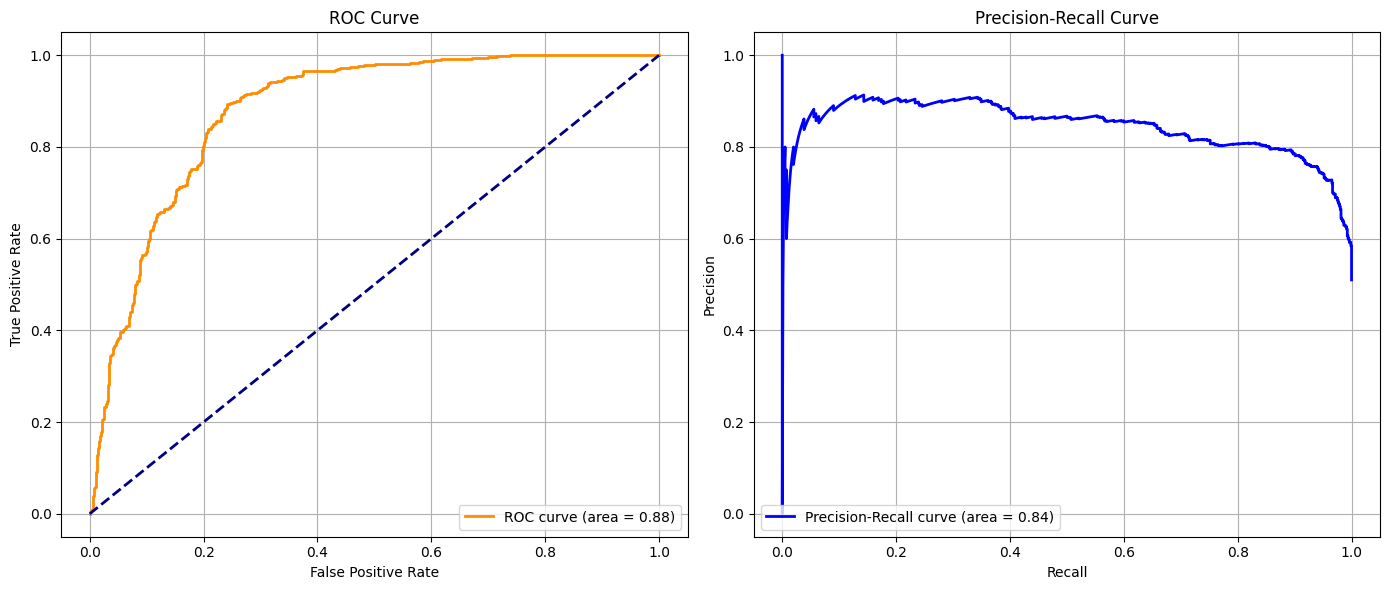

In [5]:
precision, recall, _ = precision_recall_curve(y_train, y_pred_adasyn)
pr_auc = auc(recall, precision)

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_train, y_pred_adasyn)
roc_auc = auc(fpr, tpr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la curva ROC
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")
ax1.grid()

# Gráfico de la curva de Precisión-Recall
ax2.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")
ax2.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# BorderlineSMOTE

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_borderline, y_borderline, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

log_reg = LogisticRegression(max_iter=2000)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

coef_log_reg = []
precision_scores = []
recall_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y_train), 1):
    
    X_fold_train, X_fold_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]
        
    log_reg.fit(X_fold_train, y_fold_train)
    
    coef_log_reg.append(log_reg.coef_[0])
    
    y_pred = log_reg.predict(X_fold_train)
    
    precision = precision_score(y_fold_train, y_pred)
    recall = recall_score(y_fold_train, y_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1 = f1_score(y_fold_train, y_pred)

    print(f"Fold {fold}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, f1: {f1:.2f}")
    print("-" * 30)

coef_df = pd.DataFrame(coef_log_reg, columns=X_borderline.columns)

print("Desempeño promedio en validación cruzada:")
print(f"Precision promedio: {np.mean(precision_scores):.4f}")
print(f"Recall promedio: {np.mean(recall_scores):.4f}\n"+"-"*30)
coef_df

Fold 1
Precision: 0.7982, Recall: 0.8472, f1: 0.82
------------------------------
Fold 2
Precision: 0.7970, Recall: 0.8486, f1: 0.82
------------------------------
Fold 3
Precision: 0.8073, Recall: 0.8328, f1: 0.82
------------------------------
Fold 4
Precision: 0.8066, Recall: 0.8486, f1: 0.83
------------------------------
Fold 5
Precision: 0.8003, Recall: 0.8457, f1: 0.82
------------------------------
Desempeño promedio en validación cruzada:
Precision promedio: 0.8019
Recall promedio: 0.8446
------------------------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.015037,-0.734943,0.454039,0.208555,-0.501835,0.307010,-0.528368,0.550773,1.141354
1,0.079024,-0.624546,0.480841,0.233024,-0.628123,0.314113,-0.577734,0.683629,1.228034
2,-0.123855,-0.591383,0.679575,0.178129,-0.572497,0.414460,-0.562047,0.640354,1.209221
3,0.146948,-0.720357,0.371214,0.231722,-0.537417,0.348710,-0.617269,0.697630,1.165151
4,0.092443,-0.668834,0.362572,0.203241,-0.480024,0.283432,-0.471297,0.722116,1.253321


In [8]:
model_borderline = LogisticRegression(max_iter=2000)

model_borderline.fit(X_train,y_train)

y_pred_borderline = model_borderline.predict_proba(X_train)[:,1]

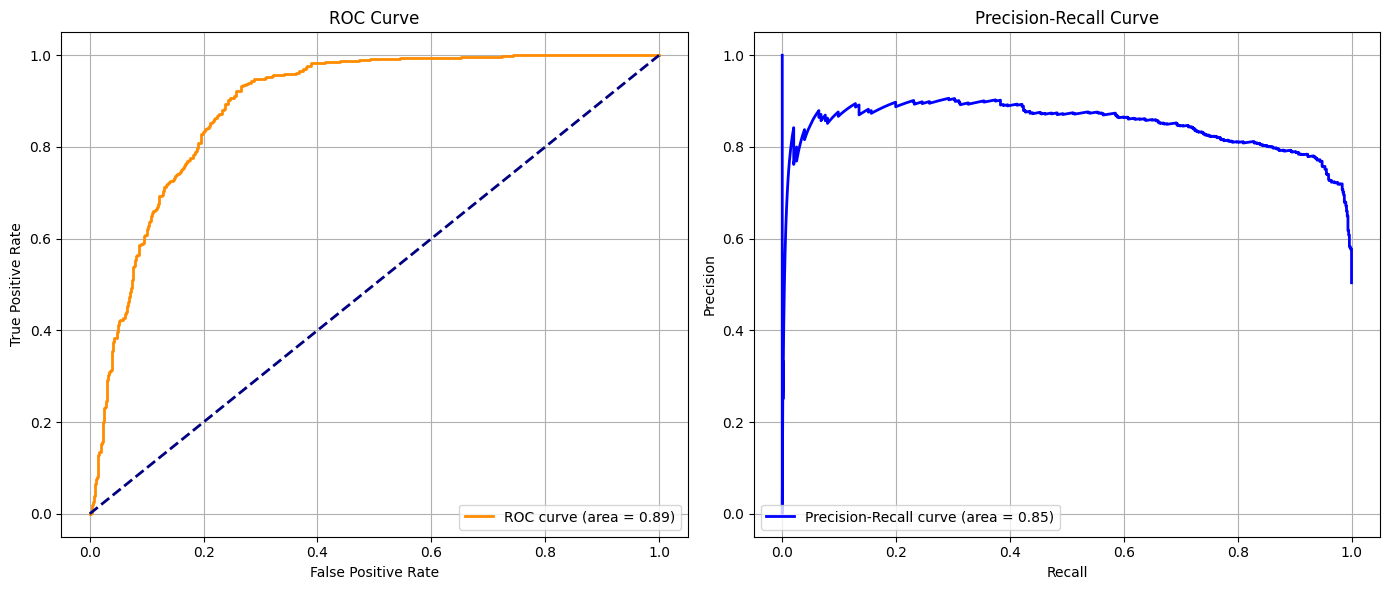

In [9]:
precision, recall, _ = precision_recall_curve(y_train, y_pred_borderline)
pr_auc = auc(recall, precision)

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_train, y_pred_borderline)
roc_auc = auc(fpr, tpr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la curva ROC
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")
ax1.grid()

# Gráfico de la curva de Precisión-Recall
ax2.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")
ax2.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# ROS

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

log_reg = LogisticRegression(max_iter=2000)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

coef_log_reg = []
precision_scores = []
recall_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y_train), 1):
    
    X_fold_train, X_fold_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]
        
    log_reg.fit(X_fold_train, y_fold_train)
    
    coef_log_reg.append(log_reg.coef_[0])
    
    y_pred = log_reg.predict(X_fold_train)
    
    precision = precision_score(y_fold_train, y_pred)
    recall = recall_score(y_fold_train, y_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1 = f1_score(y_fold_train, y_pred)

    print(f"Fold {fold}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, f1: {f1:.2f}")
    print("-" * 30)

coef_df = pd.DataFrame(coef_log_reg, columns=X_ros.columns)

print("Desempeño promedio en validación cruzada:")
print(f"Precision promedio: {np.mean(precision_scores):.4f}")
print(f"Recall promedio: {np.mean(recall_scores):.4f}\n"+"-"*30)
coef_df

Fold 1
Precision: 0.7757, Recall: 0.7953, f1: 0.79
------------------------------
Fold 2
Precision: 0.7830, Recall: 0.8139, f1: 0.80
------------------------------
Fold 3
Precision: 0.7785, Recall: 0.8091, f1: 0.79
------------------------------
Fold 4
Precision: 0.7865, Recall: 0.8076, f1: 0.80
------------------------------
Fold 5
Precision: 0.7876, Recall: 0.8173, f1: 0.80
------------------------------
Desempeño promedio en validación cruzada:
Precision promedio: 0.7822
Recall promedio: 0.8086
------------------------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.085999,-0.734630,0.220258,0.198698,-0.413266,0.101971,-0.363047,0.488964,0.988542
1,0.128031,-0.628450,0.342018,0.227154,-0.658293,0.203327,-0.400480,0.645867,1.053962
2,0.021788,-0.627476,0.405826,0.167405,-0.511580,0.211515,-0.459057,0.556845,0.992751
3,0.120899,-0.698204,0.263885,0.136940,-0.523112,0.241217,-0.445062,0.654157,0.968930
4,0.181671,-0.599159,0.223368,0.147407,-0.618012,0.188902,-0.390985,0.633954,1.058460


In [21]:
model_ros = LogisticRegression(max_iter=2000)

model_ros.fit(X_train,y_train)

y_pred_ros = model_ros.predict_proba(X_train)[:,1]

C:\Users\diego\AppData\Local\Temp\ipykernel_19316\875776419.py:5: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


Mejor umbral para la curva de Precisión-Recall: 0.9970958997382252
F1-score máximo: nan
Mejor umbral para la curva ROC: 0.4315565045295092
TPR: 0.8701134930643127, FPR: 0.2599231754161332


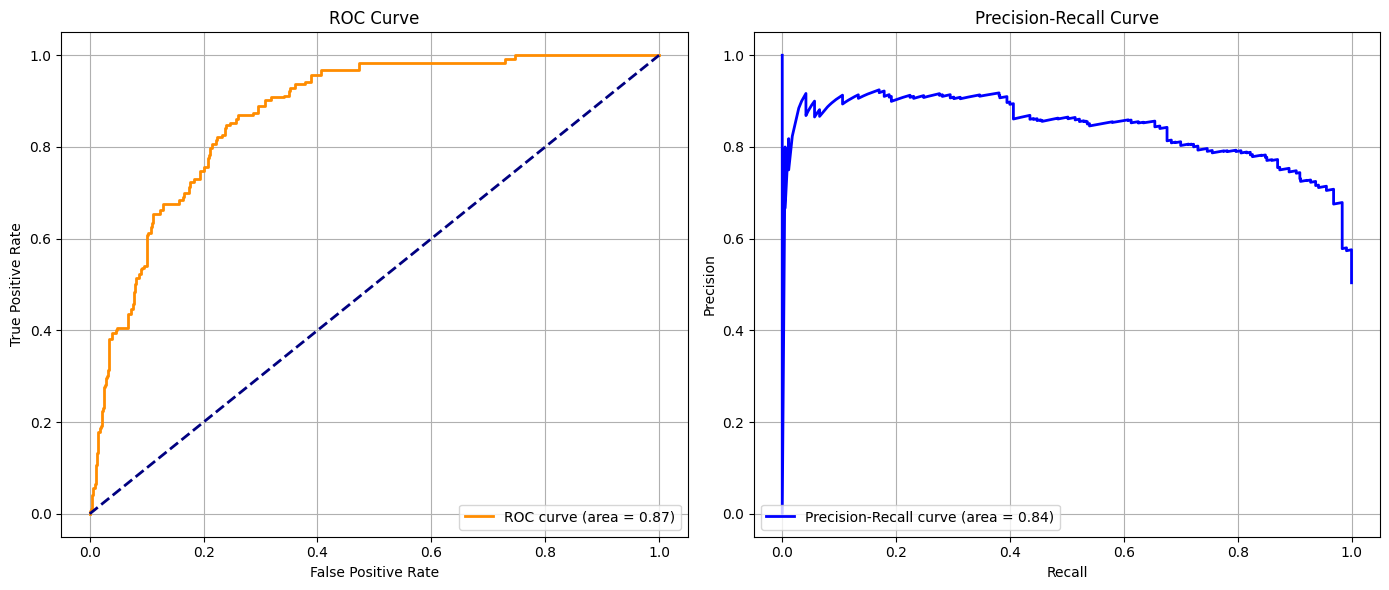

In [ ]:
precision, recall, _ = precision_recall_curve(y_train, y_pred_ros)
pr_auc = auc(recall, precision)

# Calcular F1 para cada umbral
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index_pr = np.argmax(f1_scores)
best_threshold_pr = _[best_threshold_index_pr]

print(f"Mejor umbral para la curva de Precisión-Recall: {best_threshold_pr}")
print(f"F1-score máximo: {f1_scores[best_threshold_index_pr]}")

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_train, y_pred_ros)
roc_auc = auc(fpr, tpr)

youden_index = tpr - fpr
best_threshold_index_roc = np.argmax(youden_index)
best_threshold_roc = _[best_threshold_index_roc]
best_tpr = tpr[best_threshold_index_roc]
best_fpr = fpr[best_threshold_index_roc]

print(f"Mejor umbral para la curva ROC: {best_threshold_roc}")
print(f"TPR: {best_tpr}, FPR: {best_fpr}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la curva ROC
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")
ax1.grid()

# Gráfico de la curva de Precisión-Recall
ax2.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")
ax2.grid()

ax1.plot(best_fpr, best_tpr, marker='o', color='red', label=f'Mejor umbral (FPR={best_fpr:.2f}, TPR={best_tpr:.2f})')
ax1.legend(loc="lower right")

# Marcar el mejor umbral en la curva de Precisión-Recall
ax2.plot(recall[best_threshold_index_pr], precision[best_threshold_index_pr], marker='o', color='red', 
         label=f'Mejor umbral (Recall={recall[best_threshold_index_pr]:.2f}, Precision={precision[best_threshold_index_pr]:.2f})')
ax2.legend(loc="lower left")



# Mostrar la gráfica
plt.tight_layout()
plt.show()

# RUS

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

log_reg = LogisticRegression(max_iter=2000)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

coef_log_reg = []
precision_scores = []
recall_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y_train), 1):
    
    X_fold_train, X_fold_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]
        
    log_reg.fit(X_fold_train, y_fold_train)
    
    coef_log_reg.append(log_reg.coef_[0])
    
    y_pred = log_reg.predict(X_fold_train)
    
    precision = precision_score(y_fold_train, y_pred)
    recall = recall_score(y_fold_train, y_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1 = f1_score(y_fold_train, y_pred)

    print(f"Fold {fold}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, f1: {f1:.2f}")
    print("-" * 30)

coef_df = pd.DataFrame(coef_log_reg, columns=X_rus.columns)

print("Desempeño promedio en validación cruzada:")
print(f"Precision promedio: {np.mean(precision_scores):.4f}")
print(f"Recall promedio: {np.mean(recall_scores):.4f}\n"+"-"*30)
coef_df

Fold 1
Precision: 0.7745, Recall: 0.7745, f1: 0.77
------------------------------
Fold 2
Precision: 0.7941, Recall: 0.7941, f1: 0.79
------------------------------
Fold 3
Precision: 0.7358, Recall: 0.7647, f1: 0.75
------------------------------
Fold 4
Precision: 0.7679, Recall: 0.8350, f1: 0.80
------------------------------
Fold 5
Precision: 0.7963, Recall: 0.8350, f1: 0.82
------------------------------
Desempeño promedio en validación cruzada:
Precision promedio: 0.7737
Recall promedio: 0.8006
------------------------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,-0.148875,-0.403560,0.612909,0.174191,-0.328560,0.409919,-0.577787,0.427895,0.955226
1,-0.197585,-0.406386,0.629516,0.389414,-0.345967,0.271730,-0.781009,0.393772,1.187143
2,-0.180149,-0.394948,0.612187,0.138221,-0.310191,0.339034,-0.629666,0.369735,0.966407
3,0.092398,-0.716217,0.249044,0.065499,-0.180281,0.292568,-0.353993,0.501879,1.010870
4,-0.104748,-0.425200,0.517359,0.104313,-0.625621,0.436951,-0.522787,0.442380,1.244883


In [17]:
model_rus = LogisticRegression(max_iter=2000)

model_rus.fit(X_train,y_train)

y_pred_rus = model_rus.predict_proba(X_train)[:,1]

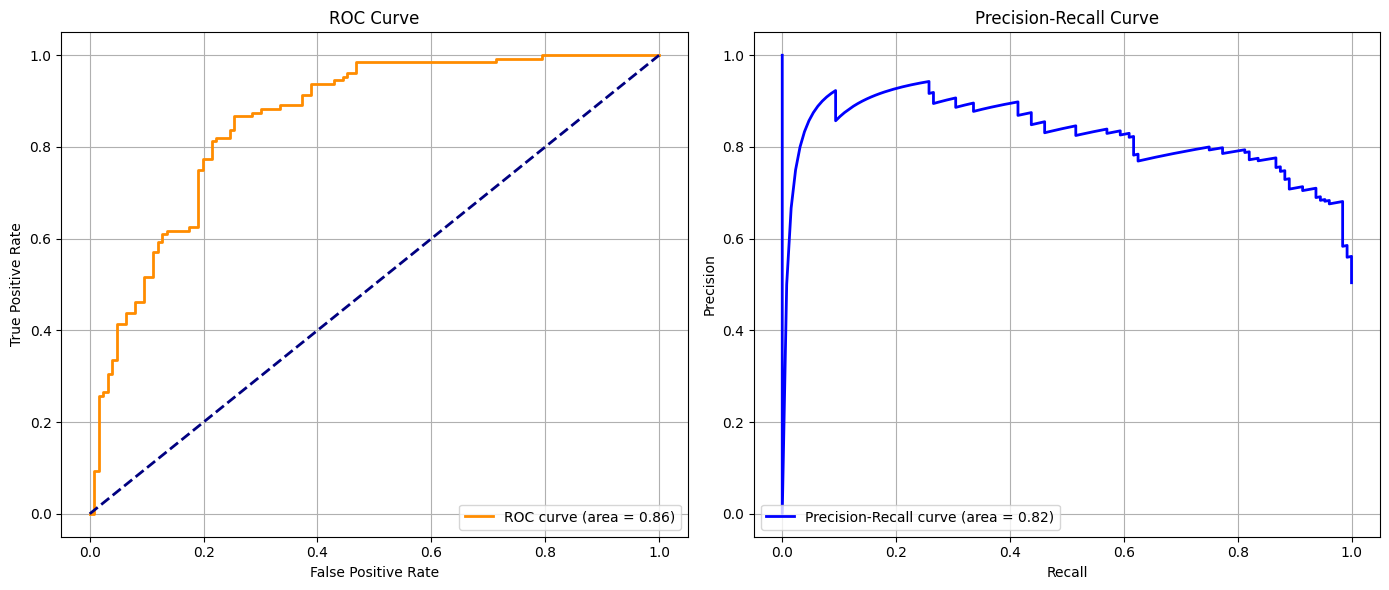

In [18]:
precision, recall, _ = precision_recall_curve(y_train, y_pred_rus)
pr_auc = auc(recall, precision)

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_train, y_pred_rus)
roc_auc = auc(fpr, tpr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la curva ROC
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")
ax1.grid()

# Gráfico de la curva de Precisión-Recall
ax2.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")
ax2.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

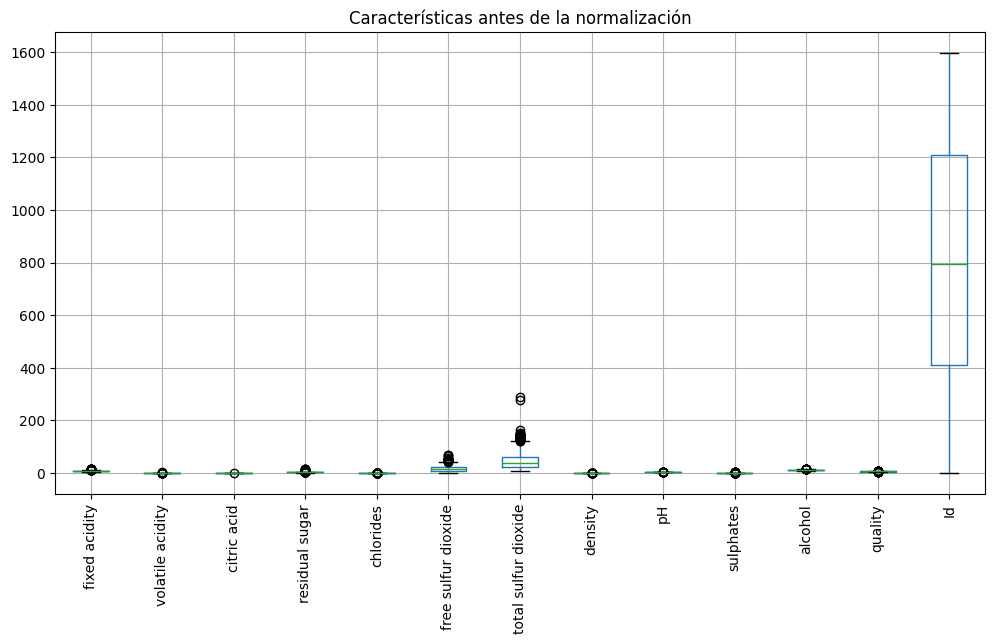

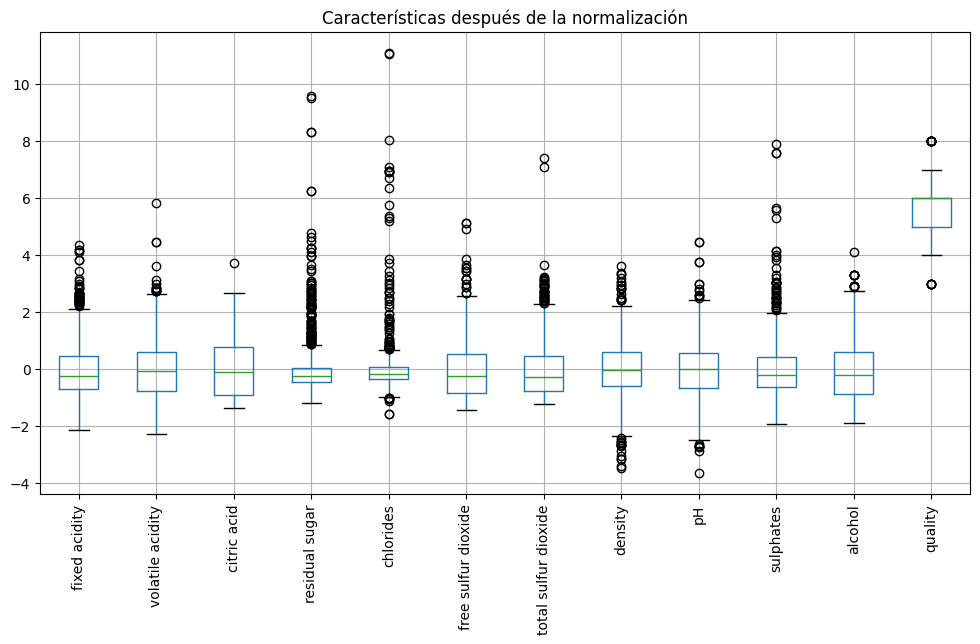

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Antes de la normalización
plt.figure(figsize=(12,6))
Wine.boxplot()
plt.title('Características antes de la normalización')
plt.xticks(rotation=90)
plt.show()
# Normalización de caracteristicas

scaler = StandardScaler()
Wine_imputed = Wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

X = Wine.drop(columns=["pH", "density","residual sugar","citric acid","Calidad","quality","Calidad","Id"])
y = Wine.Calidad

print(f"Distribución de clases antes del sobremuestreo: {Counter(y)}")

adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
print(f"Distribución de clases después de ADASYN: {Counter(y_adasyn)}")

# Borderline-SMOTE
borderline_smote = BorderlineSMOTE(sampling_strategy='minority', random_state=42, kind='borderline-1')
X_borderline, y_borderline = borderline_smote.fit_resample(X, y)
print(f"Distribución de clases después de Borderline-SMOTE: {Counter(y_borderline)}")

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
print(f"Distribución de clases después de sobremuestreo simple: {Counter(y_ros)}")

# Submuestreo simple con RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
print(f"Distribución de clases después de submuestreo simple: {Counter(y_rus)}")

# SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X, y)

Wine_scaled = pd.DataFrame(scaler.fit_transform(Wine_imputed), columns=Wine_imputed.columns)
Wine_scaled["quality"] = Wine["quality"]

Wine = Wine_scaled 

plt.figure(figsize=(12,6))
Wine.boxplot()
plt.title('Características después de la normalización')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN, BorderlineSMOTE
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

Wine['Calidad'] = np.where(Wine['quality'] >= 7, 1, 0)

X = Wine.drop(columns=["pH", "density","residual sugar","citric acid","Calidad","quality","Calidad","Id"])
y = Wine.Calidad

print(f"Distribución de clases antes del sobremuestreo: {Counter(y)}")

# ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
print(f"Distribución de clases después de ADASYN: {Counter(y_adasyn)}")

# Borderline-SMOTE
borderline_smote = BorderlineSMOTE(sampling_strategy='minority', random_state=42, kind='borderline-1')
X_borderline, y_borderline = borderline_smote.fit_resample(X, y)
print(f"Distribución de clases después de Borderline-SMOTE: {Counter(y_borderline)}")

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
print(f"Distribución de clases después de sobremuestreo simple: {Counter(y_ros)}")

# Submuestreo simple con RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
print(f"Distribución de clases después de submuestreo simple: {Counter(y_rus)}")

# SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X, y)

Distribución de clases antes del sobremuestreo: Counter({0: 984, 1: 159})
Distribución de clases después de ADASYN: Counter({0: 984, 1: 982})
Distribución de clases después de Borderline-SMOTE: Counter({0: 984, 1: 984})
Distribución de clases después de sobremuestreo simple: Counter({0: 984, 1: 984})
Distribución de clases después de submuestreo simple: Counter({0: 159, 1: 159})


In [92]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

log_reg = LogisticRegression(max_iter=2000)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

coef_log_reg = []
precision_scores = []
recall_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y_train), 1):
    
    X_fold_train, X_fold_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
        
    log_reg.fit(X_fold_train, y_fold_train)
    
    coef_log_reg.append(log_reg.coef_[0])
    
    y_pred = log_reg.predict(X_fold_train)
    
    precision = precision_score(y_fold_train, y_pred)
    recall = recall_score(y_fold_train, y_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1 = f1_score(y_fold_train, y_pred)

    print(f"Fold {fold}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, f1: {f1:.2f}")
    print("-" * 30)

coef_df = pd.DataFrame(coef_log_reg, columns=X.columns)

print("Desempeño promedio en validación cruzada:")
print(f"Precision promedio: {np.mean(precision_scores):.4f}")
print(f"Recall promedio: {np.mean(recall_scores):.4f}\n"+"-"*30)
coef_df

Fold 1
Precision: 0.7896, Recall: 0.8275, f1: 0.81
------------------------------
Fold 2
Precision: 0.7830, Recall: 0.8243, f1: 0.80
------------------------------
Fold 3
Precision: 0.7957, Recall: 0.8325, f1: 0.81
------------------------------
Fold 4
Precision: 0.7857, Recall: 0.8246, f1: 0.80
------------------------------
Fold 5
Precision: 0.7912, Recall: 0.8291, f1: 0.81
------------------------------
Desempeño promedio en validación cruzada:
Precision promedio: 0.7890
Recall promedio: 0.8276
------------------------------


,fixed acidity,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.285019,-0.798597,-0.569602,0.189119,-0.303758,0.630860,1.124477
1,0.226386,-0.760538,-0.442434,0.106826,-0.215080,0.675645,1.134401
2,0.133418,-0.862391,-0.358078,0.304811,-0.329419,0.620074,1.268814
3,0.232737,-0.898985,-0.396998,0.119592,-0.282168,0.585511,1.212244
4,0.209090,-0.849687,-0.481263,0.240860,-0.290315,0.711789,1.143154


In [ ]:
model_adasyn = 


precision, recall, _ = precision_recall_curve(y_train, y_train_pred_proba)
pr_auc = auc(recall, precision)

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc = auc(fpr, tpr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la curva ROC
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")
ax1.grid()

# Gráfico de la curva de Precisión-Recall
ax2.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")
ax2.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [89]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_borderline, y_borderline, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=2000)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

coef_log_reg = []
precision_scores = []
recall_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train), 1):
    
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
        
    log_reg.fit(X_fold_train, y_fold_train)
    
    coef_log_reg.append(log_reg.coef_[0])
    
    y_pred = log_reg.predict(X_fold_train)
    
    precision = precision_score(y_fold_train, y_pred)
    recall = recall_score(y_fold_train, y_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1 = f1_score(y_fold_train, y_pred)

    print(f"Fold {fold}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, f1: {f1:.2f}")
    print("-" * 30)

coef_df = pd.DataFrame(coef_log_reg, columns=X.columns)

print("Desempeño promedio en validación cruzada:")
print(f"Precision promedio: {np.mean(precision_scores):.4f}")
print(f"Recall promedio: {np.mean(recall_scores):.4f}\n"+"-"*30)
coef_df

Fold 1
Precision: 0.7909, Recall: 0.8457, f1: 0.82
------------------------------
Fold 2
Precision: 0.7918, Recall: 0.8580, f1: 0.82
------------------------------
Fold 3
Precision: 0.7923, Recall: 0.8486, f1: 0.82
------------------------------
Fold 4
Precision: 0.7850, Recall: 0.8407, f1: 0.81
------------------------------
Fold 5
Precision: 0.7893, Recall: 0.8378, f1: 0.81
------------------------------
Desempeño promedio en validación cruzada:
Precision promedio: 0.7899
Recall promedio: 0.8462
------------------------------


,fixed acidity,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.206347,-3.947658,-1.727671,0.024543,-0.010848,2.034169,1.197562
1,0.275784,-3.568628,-1.554990,0.019450,-0.008535,2.607529,1.256722
2,0.203470,-3.646138,-1.702533,0.033057,-0.012218,2.513777,1.178639
3,0.262173,-3.557818,-1.677973,0.030952,-0.011115,2.458337,1.213317
4,0.254427,-3.506996,-1.657047,0.021145,-0.007962,2.599234,1.262240


In [18]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

Wine['Calidad'] = np.where(Wine['quality'] >= 7, 1, 0)

X = Wine.drop(columns=["pH", "density","residual sugar","citric acid","Calidad","quality","Calidad"])
y = Wine.Calidad

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=2000)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

coef_log_reg = []
precision_scores = []
recall_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train), 1):
    
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
        
    log_reg.fit(X_fold_train, y_fold_train)
    
    coef_log_reg.append(log_reg.coef_[0])
    
    y_pred = log_reg.predict(X_fold_train)
    
    precision = precision_score(y_fold_train, y_pred)
    recall = recall_score(y_fold_train, y_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1 = f1_score(y_fold_train, y_pred)

    print(f"Fold {fold}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, f1: {f1:.2f}")
    print("-" * 30)

coef_df = pd.DataFrame(coef_log_reg, columns=X.columns)

print("Desempeño promedio en validación cruzada:")
print(f"Precision promedio: {np.mean(precision_scores):.4f}")
print(f"Recall promedio: {np.mean(recall_scores):.4f}\n"+"-"*30)
coef_df

### REEEEEEEEEEEEEEEEEEEEEEEEEEEEEAAAAAAAAAAAAAAAAAAAAAAAAAL

Fold 1
Precision: 0.6071, Recall: 0.3269, f1: 0.42
------------------------------
Fold 2
Precision: 0.5690, Recall: 0.3143, f1: 0.40
------------------------------
Fold 3
Precision: 0.6071, Recall: 0.3238, f1: 0.42
------------------------------
Fold 4
Precision: 0.6000, Recall: 0.3143, f1: 0.41
------------------------------
Fold 5
Precision: 0.6102, Recall: 0.3429, f1: 0.44
------------------------------
Desempeño promedio en validación cruzada:
Precision promedio: 0.5987
Recall promedio: 0.3244
------------------------------


,fixed acidity,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.219166,-0.878266,-0.301222,0.075448,-0.278959,0.444508,0.988128
1,0.217592,-0.814811,-0.342053,-0.027352,-0.235241,0.532001,1.071660
2,0.225158,-0.631239,-0.294338,0.078858,-0.562235,0.591248,1.082135
3,0.166203,-0.695891,-0.688389,-0.019577,-0.264267,0.660720,0.916126
4,0.264555,-0.795699,-0.337075,0.039485,-0.324830,0.534916,0.993129


In [ ]:
threshold = 0.5

coef_log_reg = []
precision_scores = []
recall_scores = []
f1_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train), 1):

    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    log_reg.fit(X_fold_train, y_fold_train)
    
    y_probs = log_reg.predict_proba(X_fold_train)[:, 1]
    
    y_pred_custom = (y_probs >= threshold).astype(int)
    
    precision = precision_score(y_fold_train, y_pred_custom)
    recall = recall_score(y_fold_train, y_pred_custom)
    f1 = f1_score(y_fold_train, y_pred_custom)


    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    coef_log_reg.append(log_reg.coef_[0])
    
    print(f"Fold {fold}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, f1: {f1:.2f}")
    print("-" * 30)

print("Desempeño promedio en validación cruzada:")  
print(f"Precision promedio: {np.mean(precision_scores):.4f}")
print(f"Recall promedio: {np.mean(recall_scores):.4f}")
print(f"f1 promedio: {np.mean(f1_scores):.4f}\n" + "-"*30)
coef_df = pd.DataFrame(coef_log_reg, columns=X.columns)
coef_df

Fold 1
Precision: 0.6071, Recall: 0.3269, f1: 0.42
------------------------------
Fold 2
Precision: 0.5690, Recall: 0.3143, f1: 0.40
------------------------------
Fold 3
Precision: 0.6071, Recall: 0.3238, f1: 0.42
------------------------------
Fold 4
Precision: 0.6000, Recall: 0.3143, f1: 0.41
------------------------------
Fold 5
Precision: 0.6102, Recall: 0.3429, f1: 0.44
------------------------------
Desempeño promedio en validación cruzada:
Precision promedio: 0.5987
Recall promedio: 0.3244
f1 promedio: 0.4208
------------------------------


,fixed acidity,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.219166,-0.878266,-0.301222,0.075448,-0.278959,0.444508,0.988128
1,0.217592,-0.814811,-0.342053,-0.027352,-0.235241,0.532001,1.071660
2,0.225158,-0.631239,-0.294338,0.078858,-0.562235,0.591248,1.082135
3,0.166203,-0.695891,-0.688389,-0.019577,-0.264267,0.660720,0.916126
4,0.264555,-0.795699,-0.337075,0.039485,-0.324830,0.534916,0.993129


In [20]:
model = LogisticRegression()

model.fit(X_train,y_train)

y_train_pred_proba = model.predict_proba(X_train)[:,1]

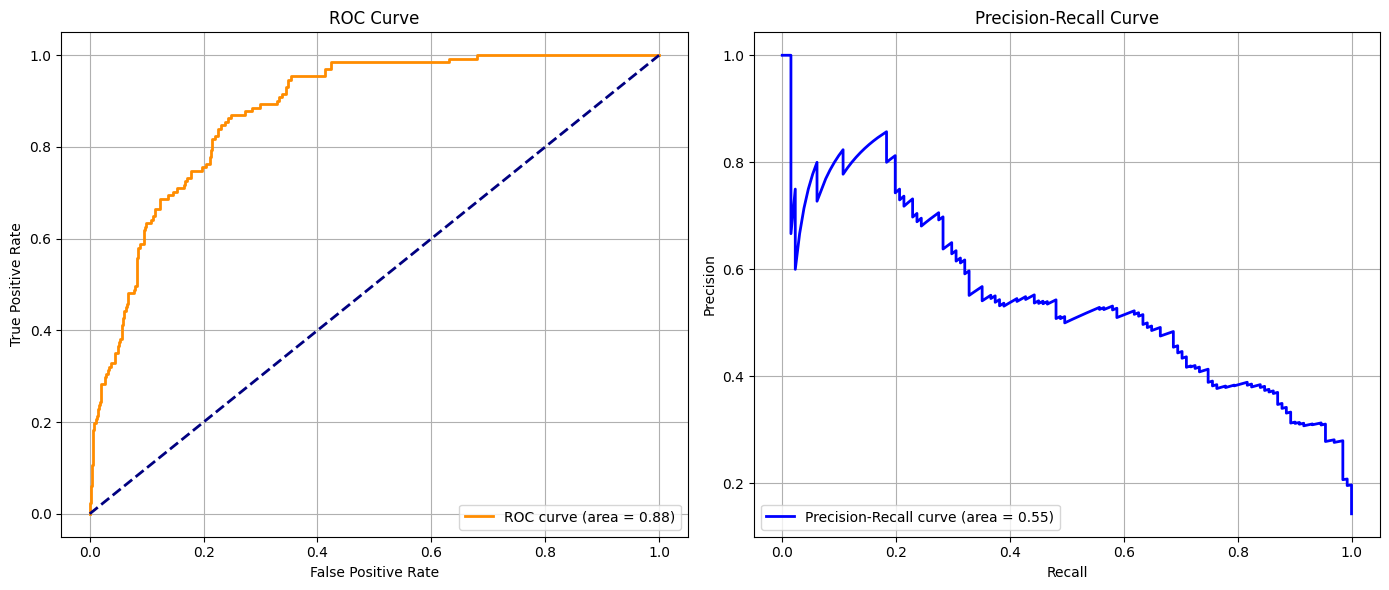

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score


precision, recall, _ = precision_recall_curve(y_train, y_train_pred_proba)
pr_auc = auc(recall, precision)

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc = auc(fpr, tpr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la curva ROC
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")
ax1.grid()

# Gráfico de la curva de Precisión-Recall
ax2.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")
ax2.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.api import Logit, add_constant
import numpy as np

Wine['Calidad'] = np.where(Wine['quality'] >= 7, 1, 0)

X = add_constant(Wine.drop(columns=["pH", "density","residual sugar","citric acid","Calidad","quality"]))
y = Wine.Calidad

# Ajustar un modelo de regresión logística
model = Logit(y, X).fit(disp=False)

In [38]:
Wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id', 'Calidad'],
      dtype='object')

In [73]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from statsmodels.api import Logit, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.api import Logit, add_constant
import numpy as np

Wine['Calidad'] = np.where(Wine['quality'] >= 7, 1, 0)

X = add_constant(Wine.drop(columns=["pH", "density","residual sugar","citric acid","Calidad","quality","Id"]))
y = Wine.Calidad

# Ajustar un modelo de regresión logística
model = Logit(y, X).fit(disp=False)

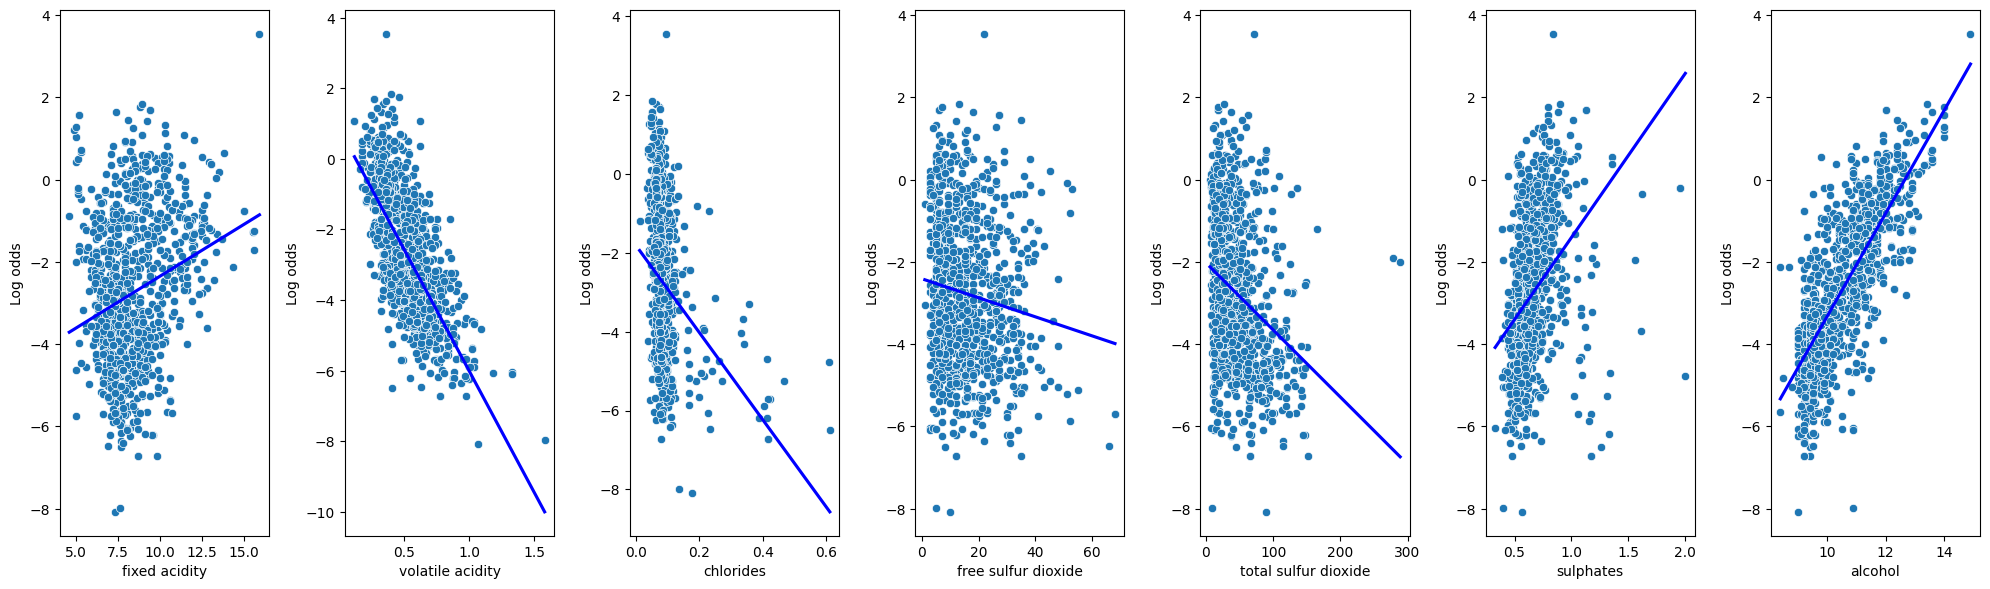

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

logit_pred = np.log(model.predict() / (1 - model.predict()))

plt.figure(figsize=(20, 6))
for i, column in enumerate(X.columns[1:]):  # Omitir la constante
    plt.subplot(1, len(X.columns) - 1, i + 1)
    sns.scatterplot(x=X[column], y=logit_pred)
    sns.regplot(x=X[column], y=logit_pred, ci=None, scatter=False, color='blue')  # Línea de regresión lineal
    plt.xlabel(column)
    plt.ylabel("Log odds")
plt.tight_layout()
plt.show()


In [75]:
from scipy import stats

influence = model.get_influence()

summ_df = influence.summary_frame()

# Filter summary df to Cook distance
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Append absolute standardized residual values
diagnosis_df['std_resid'] = stats.zscore(model.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# Sort by Cook's Distance
diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df

,cooks_d,std_resid
0,9.447855e-07,0.080891
1,6.172080e-07,0.058970
2,1.217998e-06,0.088374
3,1.192319e-04,0.377940
4,9.447855e-07,0.080891
...,...,...
1138,1.123155e-04,0.388517
1139,1.155399e-05,0.166670
1140,9.880550e-06,0.165827
1141,2.275081e-04,0.396514


In [ ]:
cook_threshold =    4 / len(X)
print(f"Threshold for Cook Distance = {cook_threshold}")

Threshold for Cook Distance = 0.003499562554680665


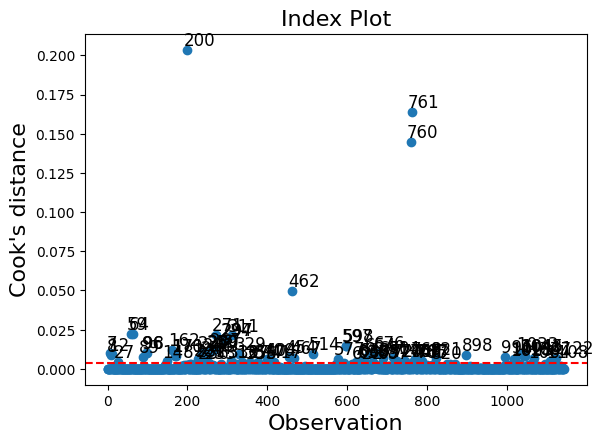

In [77]:
fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y=cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

In [44]:
outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(X)),1)
print(f'Proportion of data points that are highly influential = {prop_outliers}%')

Proportion of data points that are highly influential = 6.5%


In [45]:
# Find number of observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

prop_extreme = round(100*(len(extreme) / len(X)),1)
print(f'Proportion of highly influential outliers = {prop_extreme}%')

Proportion of highly influential outliers = 2.6%


In [60]:
y_pred = model.predict(X)
y_pred = np.where(y_pred >= 0.5,1,0)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

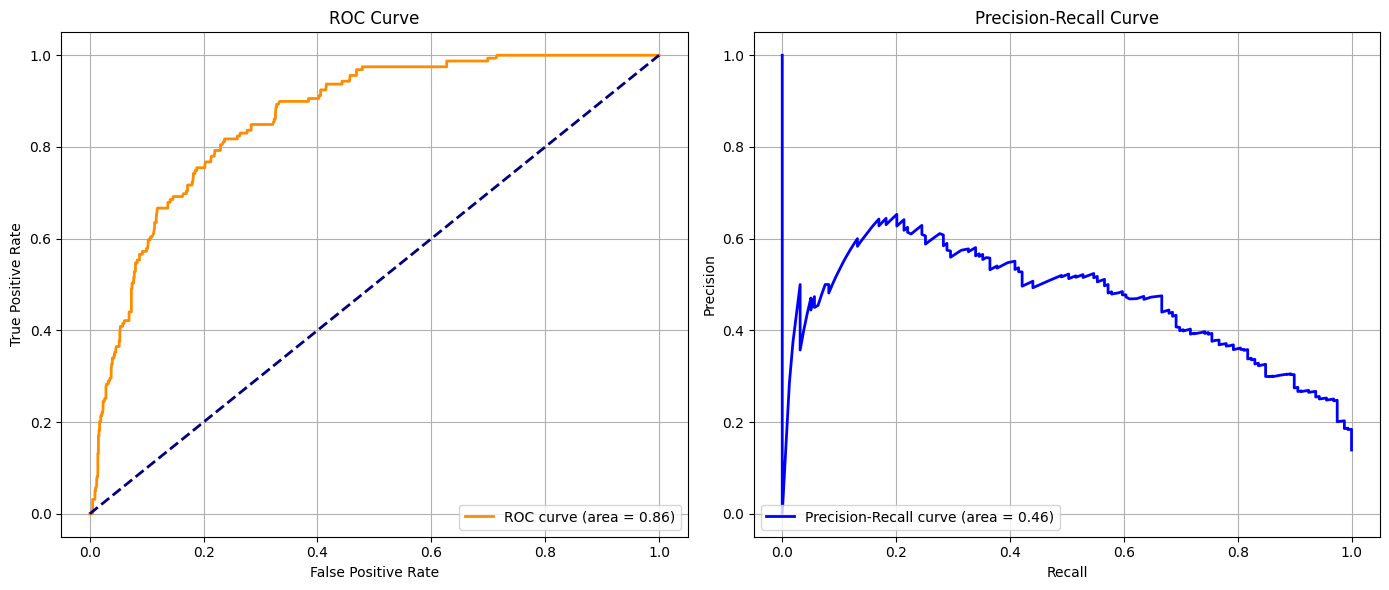

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score, classification_report

precision, recall, _ = precision_recall_curve(y, y_pred)
pr_auc = auc(recall, precision)

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la curva ROC
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")
ax1.grid()

# Gráfico de la curva de Precisión-Recall
ax2.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")
ax2.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [62]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       984
           1       0.59      0.28      0.38       159

    accuracy                           0.87      1143
   macro avg       0.74      0.63      0.66      1143
weighted avg       0.85      0.87      0.85      1143



In [28]:
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
200,0.203523,5.955418
761,0.164109,3.131221
760,0.144576,3.003753
462,0.049510,6.688815
294,0.018576,4.335598
